In [113]:
import math
import random

class Point:
    def __init__(self, x=None , y=None):
        self.x = x
        self.y = y
        
    def distanceTo(self, other) -> float:
        xDistance = abs(self.x - other.x)
        yDistance = abs(self.y - other.y)
        distance = math.sqrt( (xDistance*xDistance) + (yDistance*yDistance))
        return distance
    
    def __repr__(self):        
        string = "(" + str(self.x) + "," + str(self.y)+ ")"       
        return string
        
        

In [114]:
class Individual:
    def __init__(self):
        self.chromosome = []
        self.fitness = None
    
    def add (self, city: Point):
        self.chromosome.append (city)
        
    def cloneInto (self, mutant):
        for i in range(0, len (self.chromosome)):
            mutant.add (self.chromosome[i])
    
    
    def mutate (self, times=1):
        mutant = Individual()
        self.cloneInto (mutant)
        size = len (self.chromosome)
        for i in range (times):       
            ith = int (random.random () * size)
            jth = int (random.random () * size)
            a = mutant.chromosome[ith]
            b = mutant.chromosome[jth]
            mutant.chromosome[ith] = b
            mutant.chromosome[jth] = a
        return mutant
        
    #def crossover (self, other : Individual)->Individual:
        
    def calcFitness (self)->float:       
        length = 0
        for i in range (len (self.chromosome) -1):
            length += self.chromosome[i].distanceTo (self.chromosome[i+1])
        self.fitness = length
        return self.fitness
     
    def getFitness (self):
        return self.fitness
    
    def setFitness (self, fitness):
        self.fitness = fitness
    
    def __repr__(self):
        braket = "<"
        for i in range(0, len (self.chromosome)):
            braket += "(" + str(self.chromosome[i].x) + "," + str(self.chromosome[i].y)+ ")"+ "|"
        braket += ">" 
        return braket
        
        

In [115]:
class GO:
    def __init__ (self, seed, populationSize):
        self.population = []
        self.seed = seed
        self.mutationRate = 1.0
        self.populationSize = populationSize
        self.elitism = True
        self.scoreHistory = []
        self.bestOverTime = []
    
    def makeInitialPopulation (self):
        self.population.append (self.seed)
        for i in range (self.populationSize - 1):
            mutant = self.seed.mutate ()       
            self.population.append (mutant)
        self.detAllFitness()
        
    def getIndividuals (self):
        return self.population
    
    def add (self, individual):
        self.population.append (individual)
    
    def detAllFitness (self):
        for i in range(len (self.population)):
            f = self.population[i].calcFitness ()
            self.population[i].fitness = f

    def rank (self):
        self.population.sort (key = lambda individual: individual.getFitness(), reverse=True)

    def ith (self, idx):
        return self.population[idx]
       
    def godout (self):
        print (1, "\n")
        print ("c d\n")
        first = self.population[0].chromosome
       
        for i in range (len (first) -1):            
            print ("g 100 edge" + str(i) + " " + str(first[i].x) + " " + str(first[i].y) + " " + str(first[i+1].x) + " " + str(first[i+1].y) + "\n")
    
    def __repr__(self):
        braket = "<"
        for i in range(0, len (self.population)):
            braket += str(self.population[i].getFitness()) + " "
        braket += ">" 
        
        return braket
          
    def evolve (self, generations):
        # create a population by mutating the seed chromosome
        self.makeInitialPopulation ()
        
        # evolve for the specified number of generations TODO: do it by time
        for generation in range (generations):
            
            # generate a new generation by mutating each individual
            newGeneration =  list(map (lambda ind: ind.mutate(), self.population))

            # perform fitness calculation on each individual of the new generation
            fitnesses = list(map (lambda ind: ind.calcFitness(), newGeneration))

            #combine old generation and new generation, and sort by fitness
            self.population.extend (newGeneration)
            self.population.sort (key = lambda ind: ind.getFitness())

            #select the top (elitist) population
            self.population = self.population[:self.populationSize]
            
            # keep some interesting stats to print out
            self.bestOverTime.append (self.population[0].getFitness())
      

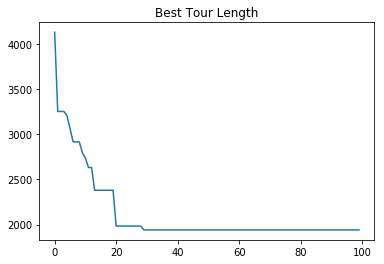

1 

c d

g 100 edge0 432 992 654 956

g 100 edge1 654 956 707 896

g 100 edge2 707 896 910 620

g 100 edge3 910 620 677 455

g 100 edge4 677 455 380 127

g 100 edge5 380 127 317 260

g 100 edge6 317 260 66 156

g 100 edge7 66 156 98 91

g 100 edge8 98 91 38 48



In [116]:
# plot the fitness
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

numberOfCities = 10
populationSize = 64
numberOfGenerations = 100

# create a seed individual (tour of cities)
seed = Individual ()

# create  random points (city), add these to the individual
for idx in range (numberOfCities):
    seed.add (Point(random.randint(0, 1000), random.randint (0, 1000)))



# create a GO engine, with a population size
go = GO(seed, populationSize)

# evolve for speecified generations
go.evolve (numberOfGenerations)

# plot the best of the population over time
x = np.arange(0,numberOfGenerations,1)
plt.plot(go.bestOverTime)
plt.title('Best Tour Length')
plt.show()
go.godout()





